In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform as tf
from skimage import morphology as morph
from skimage import io, filters, exposure, draw, measure

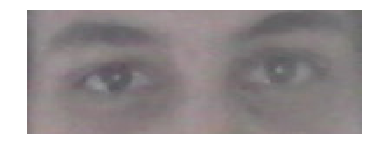

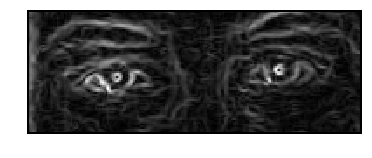

In [11]:
img_color = io.imread("img/webcam3.jpg")
img_bw = io.imread("img/webcam3.jpg", as_gray=True)
img_sobel = filters.sobel(img_bw)

plt.imshow(img_color)
plt.gca().set_axis_off()
plt.show()
plt.imshow(img_sobel, cmap="gray")
plt.gca().set_axis_off()
plt.show()

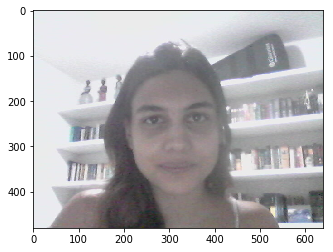

In [4]:
img_color = io.imread("img/webcam1.jpg")
plt.imshow(img_color, cmap=plt.cm.gray)
plt.show()

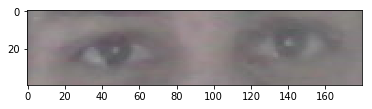

In [5]:
i = img_color[220:260, 220:400]
plt.imshow(i)
plt.show()

(128,) (128,)
(128,) (128,)
(88,) (88,)
(88,) (88,)
(112,) (112,)


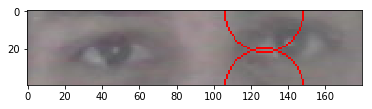

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, filters, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter

# Load picture and detect edges
image = i
img_bw = io.imread("img/webcam3.jpg", as_gray=True)
img_sobel = filters.sobel(img_bw)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))

# Detect two radii
hough_radii = np.arange(15, 30, 2)
hough_res = hough_circle(img_sobel, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    peaks = peak_local_max(h, num_peaks=2)
    centers.extend(peaks - hough_radii.max())
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius, radius])

# Draw the most prominent 5 circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:5]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    print(cx.shape, cy.shape)
    #image[cy, cx] = (250,0,0)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

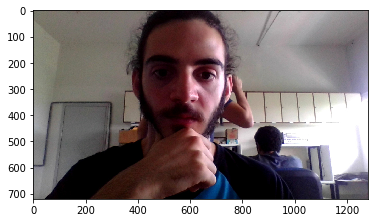

In [3]:
img_color = io.imread("img/sid.jpeg")
plt.imshow(img_color, cmap=plt.cm.gray)
plt.show()

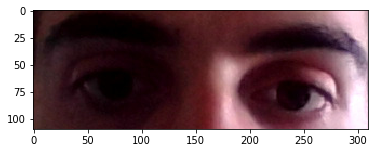

In [9]:
i = img_color[170:280, 420:730]
plt.imshow(i)
plt.show()

In [20]:
from skimage import filters, color
from skimage import img_as_ubyte
#img_bw = io.imread(i, as_grey=True)
j = img_as_ubyte(i)
img_sobel = filters.sobel(j)
plt.imshow(img_sobel)
plt.show()


ValueError: The parameter `image` must be a 2-dimensional array

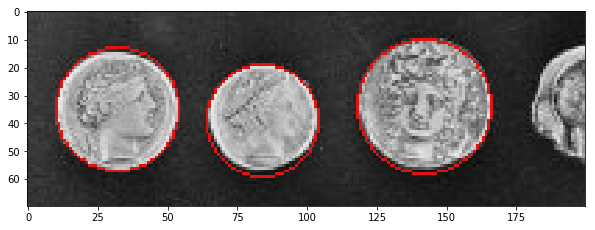

In [2]:
# Exemplo do uso da transformada de Hough circular com o módulo skimage

import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

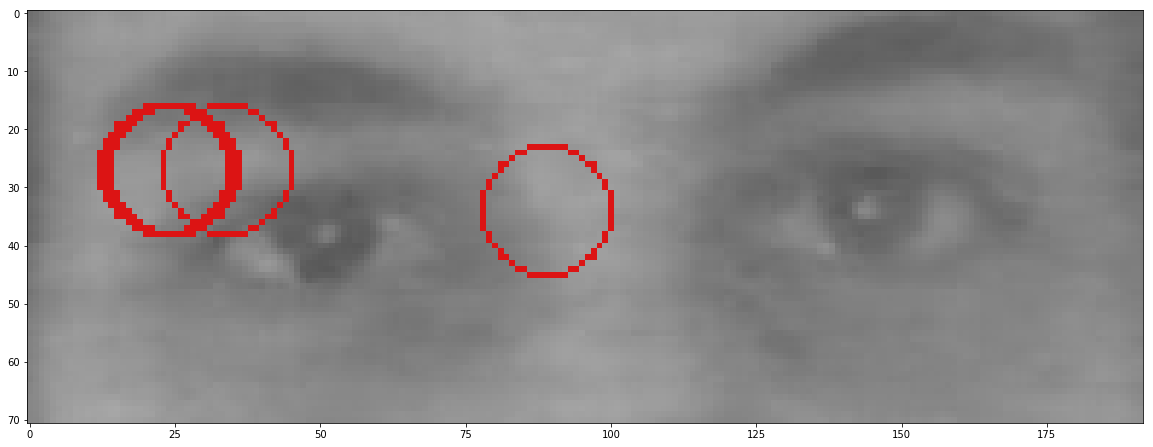

In [18]:
#código adaptado para usar a transformada na imagem do olho com o filtro sobel

import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color, filters
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread


# Load picture and detect edges
# image = img_as_ubyte(data.coins()[0:95, 70:370])
image = imread('img/webcam3.jpg')[..., 0]
#edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)
edges = filters.sobel(image)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

# Detect two radii
hough_radii = np.arange(11, 12, 13)
hough_res = hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    num_peaks = 5
    peaks = peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

# Draw the most prominent 5 circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)